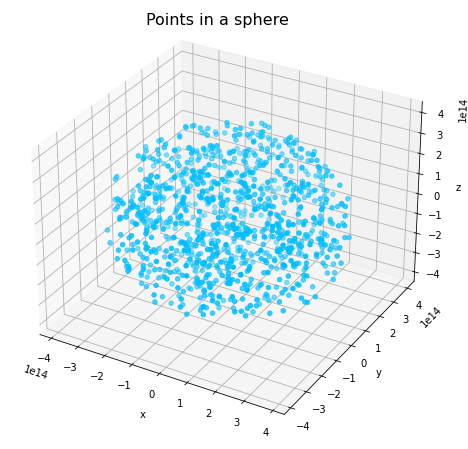

In [3]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################################################

N = 1000 #number of points
a = 40*10**13  #radius of the sphere
t_in = 0
m = 10**31
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)
### FUNCTIONS ##################################################################################################

def r(P, a) :
    return (P * a**3)**(1/3)

def theta(P) :
    return np.arccos(1 - 2*P)

def phi(P) :
    return 2 * np.pi * P

################################################################################################################


# random generated P
# three different ones in order not to be correlated
Pr = np.random.uniform(0, 1, N)
Ptheta = np.random.uniform(0, 1, N)
Pphi = np.random.uniform(0, 1, N)

# polar coordinates
r = r(Pr, a)
theta = theta(Ptheta)
phi = phi(Pphi)

'''
theta=np.arccos(np.random.uniform(-1,1,N))   # Polar
phi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
psi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
#iota = np.arccos(np.random.uniform(-1,1,mcn))  # Polar 
'''

# cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

In [4]:
sphere = open("sphere.in", "w")

#sphere.write(str(N) + "\n"+ str(t_in) + "\n")

for i in range(N):
    sphere.write(str(m) + " "+ str(x[i])+ " " + str(y[i])+ " " + str(z[i])+ " " + str(v_x[i])+ " " + str(v_y[i])+ " " + str(v_z[i]))
    if (i != N):
        sphere.write("\n")

#print(sphere.read())



# Let's do the conversion in internal units 

\begin{equation}
\frac{G_{physical} M_{physical}}{R_{physical} v^2_{physical}} = \frac{G_{internal} M_{internal}}{R_{internal} v^2_{internal}}
\end{equation}

but 
\begin{equation}
G_{internal} = 1
\end{equation}

so

\begin{equation}
G_{physical} = \frac{ \frac{R_{internal} }{ R_{physical}} \frac{ v^2_{physical} }{ v^2_{internal} }} { \frac{M_{physical} } {M_{internal}}}
\end{equation}



In [ ]:
#we can choose the units we want to use....
# I can either fix: G (=1 always), M and r, OR : G(=1 always), M, v

G = 6.674e-11
mass = []
x = []
y = []
z = []
vx =[]
vy = []
vz = []
r = []

mass, x, y, z, vx, vy, vz = np.loadtxt("input_raw.txt", delimiter=" ", comments="#", dtype="float").T
number_of_bodies = len(mass)

mass_x = [a * b for a, b in zip(mass, x)]      #mass times coordinate x
mass_y = [a * b for a, b in zip(mass, y)]      #mass times coordinate y
mass_z = [a * b for a, b in zip(mass, z)]      #mass times coordinate z
mass_vx = [a * b for a, b in zip(mass, vx)]      #mass times coordinate vx
mass_vy = [a * b for a, b in zip(mass, vy)]      #mass times coordinate vy
mass_vz = [a * b for a, b in zip(mass, vz)]      #mass times coordinate vz

cm_x = np.sum(mass_x)/sum(mass)
cm_y = np.sum(mass_y)/sum(mass)
cm_z = np.sum(mass_z)/sum(mass)
cm_vx = np.sum(mass_vx)/sum(mass)
cm_vy = np.sum(mass_vy)/sum(mass)
cm_vz = np.sum(mass_vz)/sum(mass)

